# <span style="color:darkblue"> I. Setup working environment  </span>

<font size = "5">

Import libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

<font size = "5">

Import data

In [3]:
cars = pd.read_csv("data_raw/cars.csv")

# Source: "https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv"

# <span style="color:darkblue"> II. Exporting and Organization </span>

<font size = "5">

Export to file

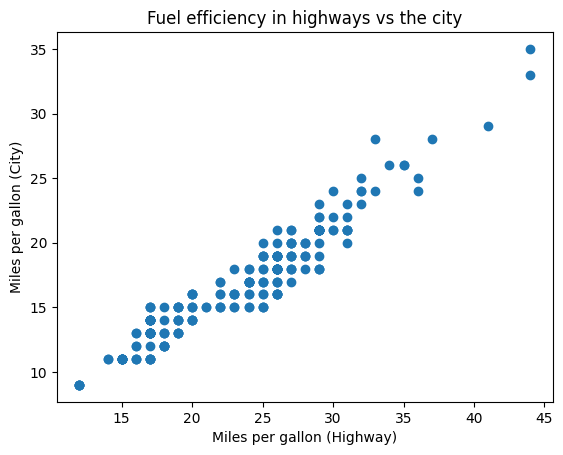

In [4]:
plt.scatter(x = cars["hwy"],y = cars["cty"])
plt.xlabel("Miles per gallon (Highway)")
plt.ylabel("Miles per gallon (City)")
plt.title("Fuel efficiency in highways vs the city")

plt.savefig("results/scatter_cty_hwy.png")


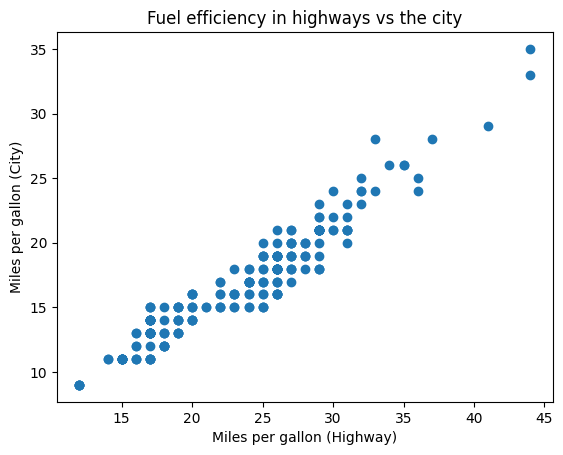

In [5]:
# Write your own code

plt.scatter(x = cars["hwy"],y = cars["cty"])
plt.xlabel("Miles per gallon (Highway)")
plt.ylabel("Miles per gallon (City)")
plt.title("Fuel efficiency in highways vs the city")

plt.savefig("results/2023-04-24-scatter.jpg")


# <span style="color:darkblue"> III. Plotting Grouped Data  </span>

<font size = "5">

Adding group indexing

In [6]:
# .groupby() adds a grouping index that can be used for grouped plotting
# ["..."] extracts a particular column from the dataset.
# Note: It's not always necessary to compute summary statistics after .groupby()

grouped_data = cars.groupby(['year'])["displ"]


<font size = "5">

Grouped statistics

In [7]:
# Compute frequency
grouped_counts_onelevel   = cars.groupby(['class']).size()
grouped_counts_multilevel = cars.groupby(['class','cyl']).size()

# Compute summary statistics by group
grouped_mean   = cars.groupby(['class','cyl'])["displ"].mean()
grouped_sum    = cars.groupby(['class','manufacturer'])["displ"].sum()
grouped_std    = cars.groupby(['class','manufacturer'])["displ"].std()
grouped_min    = cars.groupby(['class','manufacturer'])["displ"].min()
grouped_max    = cars.groupby(['class','manufacturer'])["displ"].max()

# Note: (1) Python will store the index in ".groupby()" for later plotting
#       (2) This is a succinct syntax for computing a single statistic.
#           More multiple statistics and/or custom names  use ".groupby().agg()"


<AxesSubplot: xlabel='manufacturer'>

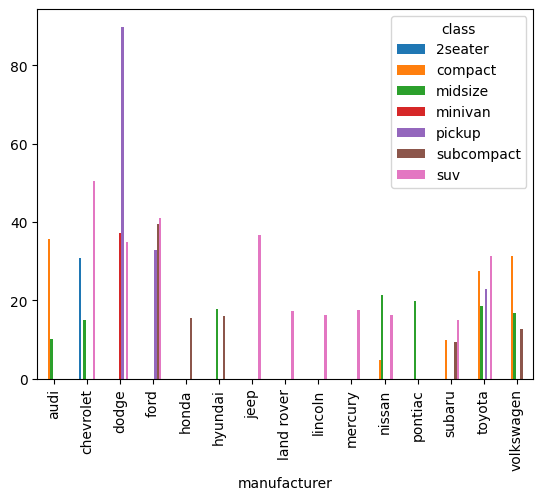

In [8]:
grouped_sum.unstack("class").plot(kind = "bar",stacked = False)

<font size = "5">

Histogram by groups

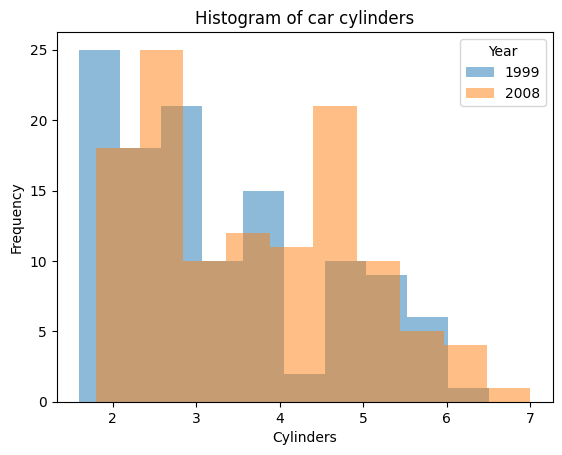

In [9]:
grouped_data.plot.hist(alpha = 0.5)
plt.xlabel("Cylinders")
plt.ylabel("Frequency")
plt.title("Histogram of car cylinders")
plt.legend(title = "Year")

<font size = "5">

Bar chart

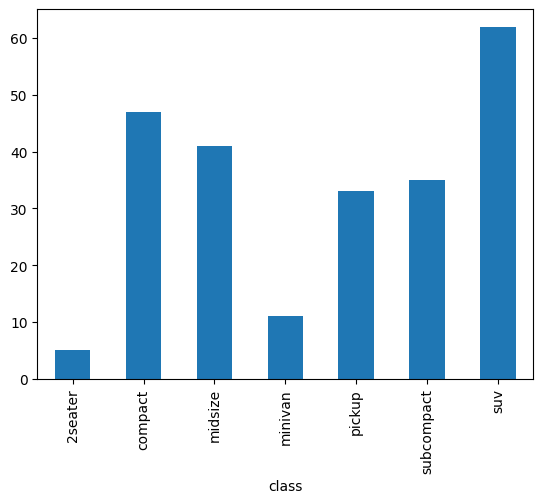

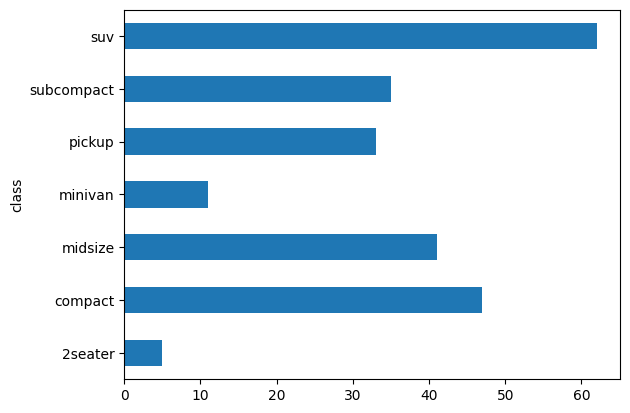

In [10]:
# A vertical bar plot
grouped_counts_onelevel.plot(kind = "bar")
plt.show()

# A horizontal bar plot
grouped_counts_onelevel.plot(kind = "barh")
plt.show()



<font size = "5">

Multi-level bar chart

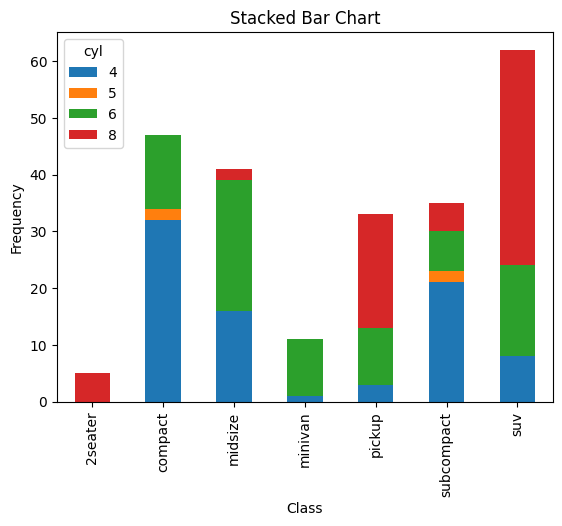

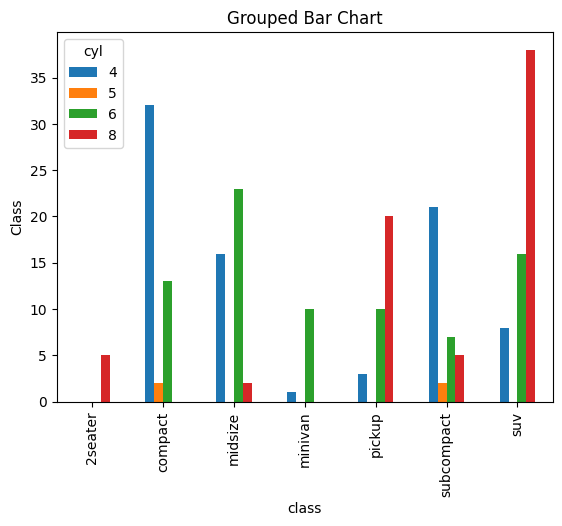

In [11]:
# .unstack("cyl") indicates that the plot should stack the results
# by "cyl" (cylinders).
grouped_counts_multilevel.unstack("cyl").plot(kind = "bar",stacked = True)
plt.title("Stacked Bar Chart")
plt.ylabel("Frequency")
plt.xlabel("Class")
plt.show()

# The grouped bar chart presents a histogram with two groupings, a primary
# and a secondary one. In this case "unstack("cyl")" indicates the secondary
# level
grouped_counts_multilevel.unstack("cyl").plot(kind = "bar",stacked = False)
plt.title("Grouped Bar Chart")
plt.ylabel("Frequency")
plt.ylabel("Class")
plt.show()

<font size = "5">

Legend options

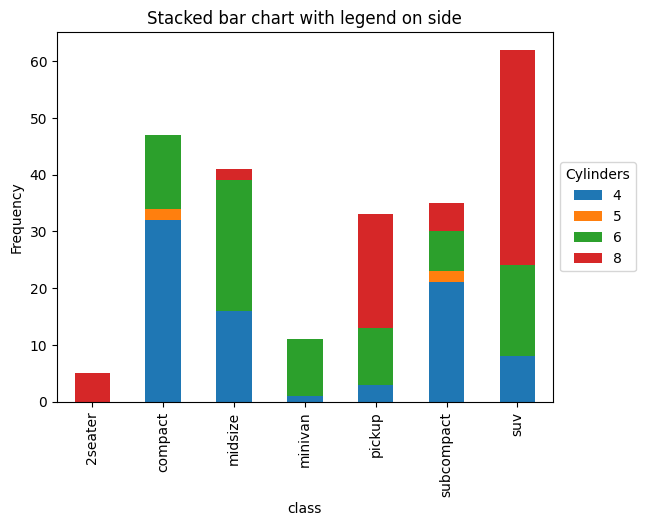

In [12]:
# Baseline plot
grouped_counts_multilevel.unstack("cyl").plot(kind = "bar",stacked = True)
plt.title("Stacked bar chart with legend on side")
plt.ylabel("Frequency")

plt.legend(title='Cylinders',
           bbox_to_anchor=(1, 0.5),
           loc='center left',)


<font size = "5">

Try it yourself!

- Compute the standard deviation of "cty" grouped <br>
by "year" and "manufacturer"
- Display a grouped bar chart with "manufacturer" as the <br>
primary level and "year" as the secondary level
- Save the figure to <br>
"results/figure_barchart_stdcty_by_year.png"

<AxesSubplot: xlabel='manufacturer'>

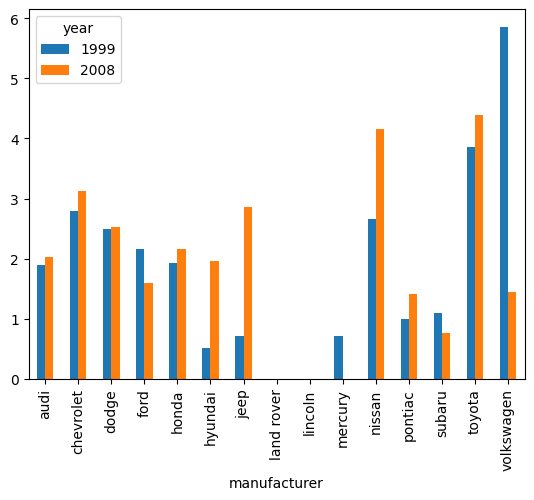

In [13]:
# Write your own code

grouped_std_2 = cars.groupby(["year","manufacturer"])["cty"].std()

grouped_std_2.unstack("year").plot(kind = "bar",stacked = False)


# <span style="color:darkblue"> IV. Styling Plots </span>

<font size = "5">

Check available styles

In [14]:
# Check which styles are available
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<font size = "5">

Set style

- ```plt.style.use()```
- Setting this command affects future plots in this file

Text(0.5, 1.0, 'Fuel efficiency in highways vs the city')

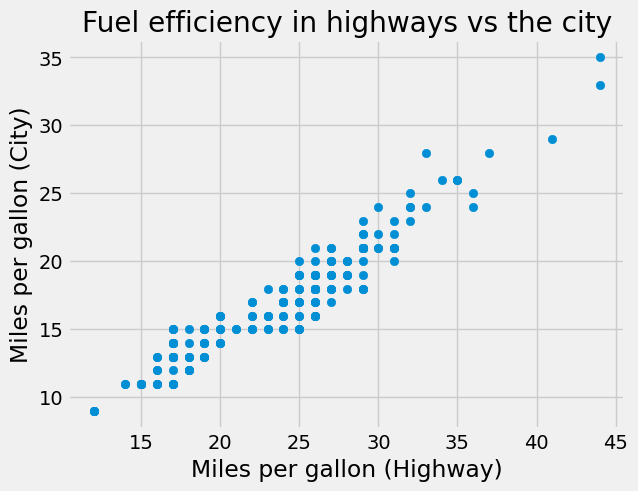

In [15]:
# Set the style. Can switch back by setting:    plt.style.use('default')

plt.style.use('fivethirtyeight')

plt.scatter(x = cars["hwy"],y = cars["cty"])
plt.xlabel("Miles per gallon (Highway)")
plt.ylabel("Miles per gallon (City)")
plt.title("Fuel efficiency in highways vs the city")


C:\Users\Michael\AppData\Local\Temp\ipykernel_46580\123008404.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')


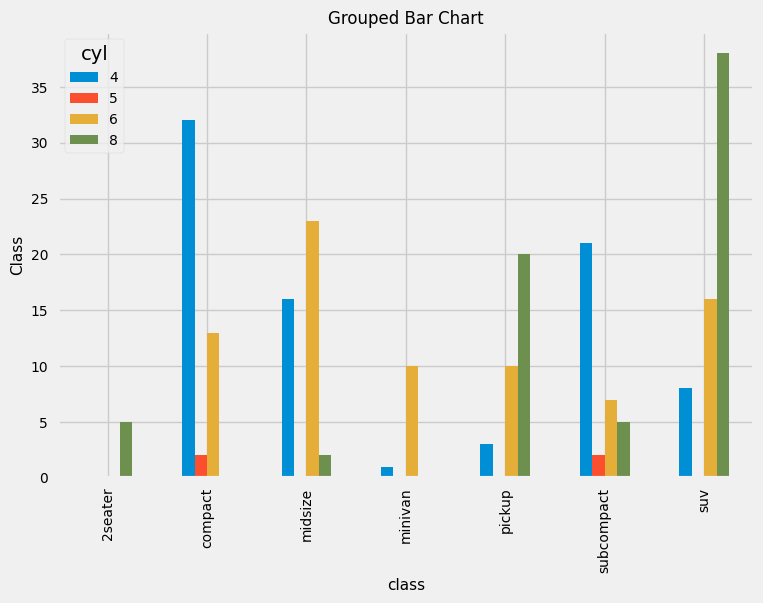

In [16]:
# Write your own code

plt.style.use('seaborn-notebook')

grouped_counts_multilevel.unstack("cyl").plot(kind = "bar",stacked = False)
plt.title("Grouped Bar Chart")
plt.ylabel("Frequency")
plt.ylabel("Class")
plt.show()
